In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
from scipy.spatial import cKDTree as KDTree
from numpy import linalg
from scipy import spatial
import os, os.path
import glob

h=0.6774

def Rs(z):
    return 59.6*((1.+30.)/(1+z))**2


def boxvol(z):
    return ((40.96*1000./h)/(1+z))**3

def disovol(z,diso='Rs'):
    if diso == 'Rs':
        r=Rs(z)
    else :
        r=float(diso)
       
    return 4*np.pi*(r**3)/3.


def volint(d,R):
    return np.pi*((2*R - d)**2) * (d**2 + 4*d*R)/(12*d)
        

In [ ]:
xxyyzz=np.array([[1,2.,3.,4.],[2,2.,3.,4.],[3,2.,3.,4.]])

volints=0.

xyz_halos = xxyyzz[:,[1,2,3]].astype('float')
    #xyz_halos=zip(x.ravel(),y.ravel(),z.ravel())
k = spatial.KDTree(xyz_halos)
ids = k.query_ball_point(xyz_halos, h*(1+10)*(2*0.1)) 
    
for ii in range(len(ids)):
        if len(ids[ii]) > 1 :
            idss=[int(a) for a in ids[ii]]
            d=[]
            for jj in range(1,len(idss)):
                
                d = linalg.norm(xyz_halos[idss[0]] - xyz_halos[idss[jj]])
                if d == 0. :
                    volints += 4.*np.pi*((0.1)**3)/3.
                    
                else :
                    volints+= volint(d,0.1)
            

In [ ]:
print volints, 3*4.*np.pi*((0.1)**3)/3.

In [2]:
rdsft = np.loadtxt('D:\\Google Drive\\gg\\alloutputs.txt')#[200:220]
dir='D:\\Google Drive\\gg\\100kpc_halos\\cumulative\\'

volints=np.zeros(len(rdsft))

for zz in range(len(rdsft)) :
    #print rdsft[zz]
    cumu=np.loadtxt(dir + 'cum_100kpc_id-xyz-rdshft_{}.txt'.format(rdsft[zz]))
    x=cumu[:,1]
    y=cumu[:,2]
    z=cumu[:,3]
    
    xyz_halos = cumu[:,[1,2,3]].astype('float')
    #xyz_halos=zip(x.ravel(),y.ravel(),z.ravel())
    k = spatial.KDTree(xyz_halos)
    ids = k.query_ball_point(xyz_halos, h*(1+rdsft[zz])*(2*0.1)) 
    cc=0
    for ii in range(len(ids)):
        if len(ids[ii]) > 1 :
            #print len(ids[ii])
            idss=[int(a) for a in ids[ii]]
            d=[]
            for jj in range(1,len(idss)):
                
                d = linalg.norm(xyz_halos[idss[0]] - xyz_halos[idss[jj]])
                if d == 0. :
                    volints[zz] += 4.*np.pi*((h*(1+rdsft[zz])*0.1)**3)/3.
                    
                else :
                    volints[zz ]+= volint(d,h*(1+rdsft[zz])*0.1)
                    
        elif len(ids[ii]) > 2 :
            idss2=[int(a) for a in ids[ii]]
            for kk in range(1,len(idss2)):
                d = linalg.norm(xyz_halos[idss[0]] - xyz_halos[idss[kk]])
            #print len(ids[ii])
            


In [ ]:
print volints

In [ ]:
print len(ids[6])

In [ ]:
def volint(d,R):
    return np.pi*(2*R - d)**2 * (d**2 + 4*d*r)/(12*d)

In [3]:
dir1='D:\\Google Drive\\gg\\100kpc_halos\\deadalive\\'
dat=np.loadtxt(dir1 + 'cumulative.txt')

total=dat[:,1]
remnant=dat[:,2]
alive=dat[:,3]

volfrac_all=[]
volfrac_alive=[]
volfrac_remnant=[]

disoo='100'

for i in range(len(rdsft)):
    volfrac_all.append((total[i]*disovol(rdsft[i],diso=disoo)-volints[i])/boxvol(rdsft[i]))
    volfrac_alive.append((alive[i]*disovol(rdsft[i],diso=disoo)-volints[i])/boxvol(rdsft[i]))
    volfrac_remnant.append((remnant[i]*disovol(rdsft[i],diso=disoo)-volints[i])/boxvol(rdsft[i]))
    


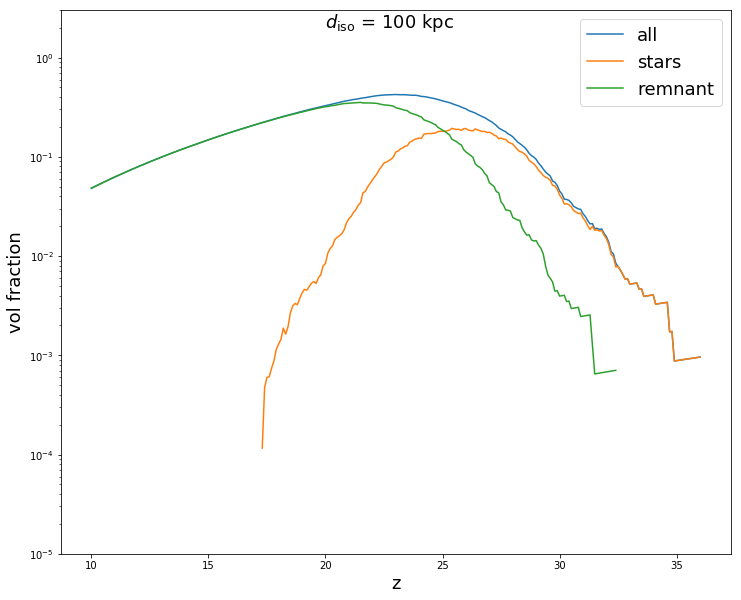

In [4]:
plt.figure(figsize=(12,10))
plt.semilogy(rdsft, volfrac_all,label='all')
plt.semilogy(rdsft[:-5], volfrac_alive[:-5],label='stars')
plt.semilogy(rdsft, volfrac_remnant,label='remnant')
plt.legend(loc='upper right',fontsize=18)
plt.ylim(10**-5,3.)
plt.xlabel('z',fontsize=18)
plt.ylabel('vol fraction',fontsize=18)
plt.text(20,2.,r'$d_{\rm{iso}}$ = 100 kpc',fontsize=18)
#plt.savefig('volfrac_100kpc.pdf',format='pdf',dpi=1000)
plt.show()

### define functions to compute optical depth


In [5]:
from scipy import interpolate

volfrac_alive_0=volfrac_alive[:-6] + [0,0,0,0,0,0]

Q_all=interpolate.InterpolatedUnivariateSpline(rdsft[::-1], volfrac_all[::-1])
Q_alive=interpolate.InterpolatedUnivariateSpline(rdsft[::-1], volfrac_alive_0[::-1])
Q_remnant=interpolate.InterpolatedUnivariateSpline(rdsft[::-1], volfrac_remnant[::-1])



In [9]:
c=3*(10**10) #cm/s

H0=67.74/(3.086*10**19) #in s^-1
#print H0


om_m=0.3089
om_l=0.6911


def H(z):
    return H0*(om_m*((1+z)**3)+om_l)**(0.5)

#mean H density : https://ned.ipac.caltech.edu/level5/Madau6/Madau1_1.html

def nH(z):
    return (1.38*10**(-7.))*(1+z)**3
    

sigmat=6.65*10**(-25.) #cm^2
Y=0.24
X=0.76

def tau(z):
    
    if z > 3. :
        return ((c*(1+z)**2)/H(z))*Q_alive(z)*sigmat*nH(z)*(1+(Y/(4*X)))
    
    elif z <= 3 :
        return ((c*(1+z)**2)/H(z))*Q_alive(z)*sigmat*nH(z)*(1+(2.*Y)/(4.*X))
        

from scipy import integrate

print integrate.quad(tau, 0, 21)





(2.5459335046509644, 1.4602667651671294e-06)
